In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [3]:
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("C:/Users/simon/OneDrive/Documents/CUA COURSES/ENGR 441 & 442/Prototype 2/MASTER DATAFRAME/NORMALIZED_MASTER.csv")

In [23]:
df.tail(5)

,Date,Generated (kWh),Efficiency,System Name,Location,System Size (kW),Solar_Irradiance,Temperature_2m,Cloud_Cover
3957,3/29/2025,0.022320,0.151825,Feuerwehr,Switzerland,0.128180,0.231303,0.260317,0.99
3958,3/29/2025,0.278940,0.244520,Pentaari,Greece,0.994626,0.193305,0.244444,0.98
3959,3/29/2025,0.555370,0.585157,MAWC,Maldives,0.827509,0.742461,0.930159,0.29
3960,3/29/2025,0.030453,0.269285,Wray Farms,United Kingdom,0.098600,0.476478,0.257143,0.59
3961,3/29/2025,0.017248,0.083073,HLT1 Klagenfurt Lastenstrasse,Austria,0.181029,0.091375,0.247619,1.00


In [7]:
X = df[['Solar_Irradiance', 'Temperature_2m', 'Cloud_Cover', 'System Size (kW)']]
y = df['Efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [9]:
param_grid = {'n_estimators': [500, 1000],
              'max_depth': [10, 50]
             }

In [11]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=10, n_estimators=500)


In [13]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

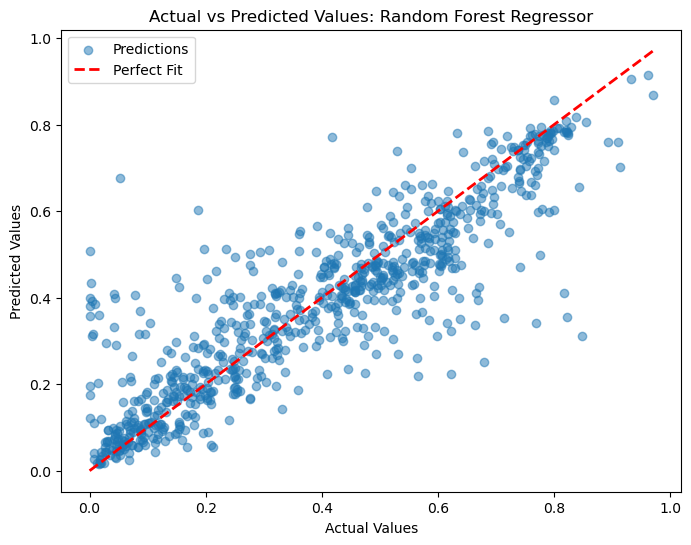

In [15]:
y_predict_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_rf, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Random Forest Regressor")
plt.legend()
plt.show()

In [17]:
test_r2 = r2_score(y_test, y_predict_rf)
test_mae = mean_absolute_error(y_test, y_predict_rf)
test_mse = mean_squared_error(y_test, y_predict_rf)

print(f"R2 Score: {test_r2:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")

R2 Score: 0.7725
MAE: 0.0771
MSE: 0.0132


In [19]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
print(f"Cross Validation Scores: {cv_scores}")

Cross Validation Scores: [0.76443114 0.73220964 0.79100367 0.78877313 0.77402404]
